# gbsv MC2 

## 3. Pattern Search in Image and Signal
### 3.1. Correlation in Signals

#### Day 1 - Auto-Correlation


Overarching Task: Choose a country and theme all the MC tasks to this county. The use cases, problem statements, signals and images should be related to your country of choice. It can be the same country as in MC1, but you may also choose a different one.


Day 1 Task
Passend zu deinem Land: Definiere einen Anwendungsfall, um zu erkennen, ob ein 1D Signal wiederkehrende Muster enthält. Suche ein passendes 1D Signal (Audio, Zeitreihe, Vitalparameter, ...), welches wiederkehrende Muster enthält, um in den Folgetagen Auto-Korrelation anzuwenden.    

### link to repo
https://github.com/BR4GR/gbsv-challenges

In [1]:
import time
start_time = time.time()
import cv2 as cv
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sounddevice as sd

from ipywidgets import interact, widgets
from matplotlib.widgets import Slider, Button, TextBox
from matplotlib.patches import Rectangle

from scipy.io.wavfile import write
from scipy.signal import correlate
from IPython.display import Markdown, Audio
from rich import print
from rich import pretty
pretty.install()
print(start_time)

1732564717.8950574

In [2]:
audio, sample_rate = librosa.load("sound/bell.wav")
print(f"{audio=}")
print(f"{audio.dtype=}")
print(f"{audio.shape=}")
print(f"{np.max(audio)=}")
print(f"{np.min(audio)=}")


display(Markdown(f"**ring the Bell**"))
display(Audio(audio, rate=sample_rate))

audio=array([2.6749703e-35, 8.3550063e-35, 1.1725352e-34, ..., 6.8832678e-04,
       7.8442483e-04, 0.0000000e+00], dtype=float32)

audio.dtype=dtype('float32')

audio.shape=(1641260,)

np.max(audio)=np.float32(0.86444175)

np.min(audio)=np.float32(-0.8645316)

**ring the Bell**

<IPython.lib.display.Audio object>

The chosen use case is to estimate the weight/size of a Swiss cowbell based on its frequency characteristics using auto-correlation. Cowbells produce distinct resonant frequencies determined by their size, material, and weight. Identifying recurring patterns in their acoustic signal can help derive these physical properties. i chose this sound because cowbells are an iconic symbol of Swiss craftsmanship and tradition, and we can always hear them on our hiking trips on weekends. The objective of this experiment is to demonstrate whether auto-correlation can reliably detect these recurring patterns and link them to the bell’s weight. The chosen signal is a recording of a Swiss cowbell.

#### Day 2 Task
Analysiere mittels Auto-Korrelation die wiederkehrenden Muster innerhalb deines 1D Signals.

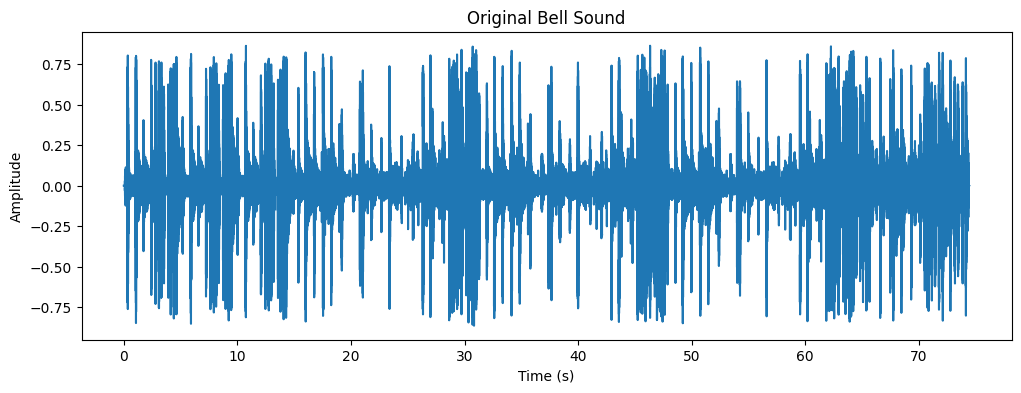

In [3]:
times = np.arange(0, len(audio)) / sample_rate
plt.figure(figsize=(12, 4))
plt.plot(times, audio)
plt.title("Original Bell Sound")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

First i will analyze the signal in the time domain, the autocorrelation, and the frequency spectrum for two cases: one signal includes the initial hit of the bell, while the other excludes it. This helps us determine how the initial strike influences the periodicity and dominant frequencies.

## **this is only the ringing, without the initial hit**

<IPython.lib.display.Audio object>

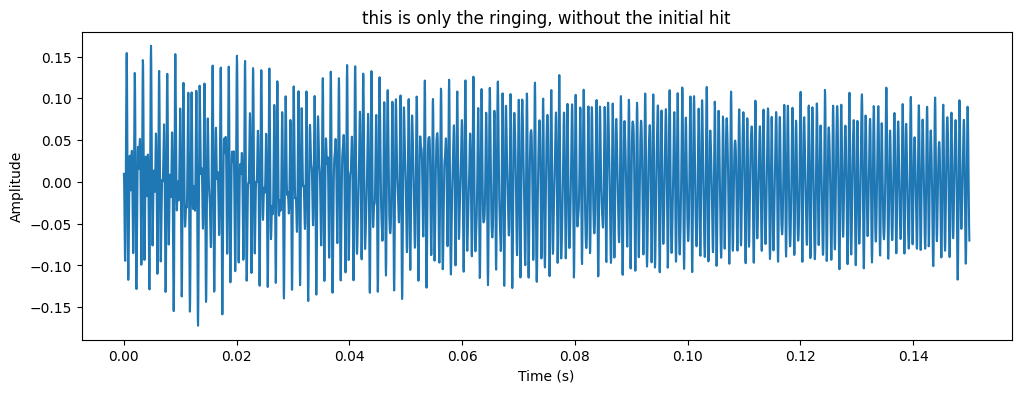

## **this is the ringing, with the initial hit**

<IPython.lib.display.Audio object>

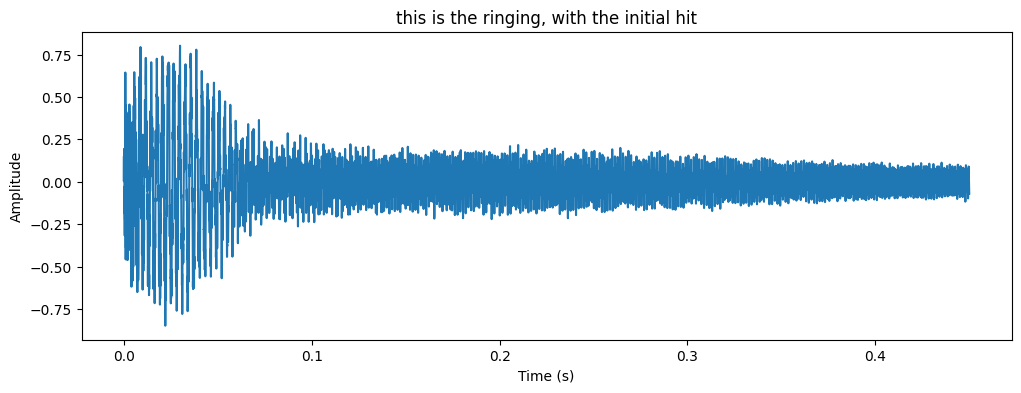

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import correlate, find_peaks
from scipy.fftpack import fft

from IPython.display import Markdown, Audio

def trim_signal(signal, sample_rate, start_time, end_time):
    start_sample = int(start_time * sample_rate)
    end_sample = int(end_time * sample_rate)
    signal = signal[start_sample:end_sample]
    return  signal


signal = trim_signal(audio, sample_rate, 1.35, 1.5)
write('sound/bell_no_hit.wav', sample_rate, signal)


display(Markdown(f"## **this is only the ringing, without the initial hit**"))
display(Audio(signal, rate=sample_rate))
times = np.arange(0, len(signal)) / sample_rate
plt.figure(figsize=(12, 4))
plt.plot(times, signal)
plt.title("this is only the ringing, without the initial hit")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

signal_hit = trim_signal(audio, sample_rate, 1.05, 1.5)
write('sound/bell_with_hit.wav', sample_rate, signal)


display(Markdown(f"## **this is the ringing, with the initial hit**"))
display(Audio(signal_hit, rate=sample_rate))
times = np.arange(0, len(signal_hit)) / sample_rate
plt.figure(figsize=(12, 4))
plt.plot(times, signal_hit)
plt.title("this is the ringing, with the initial hit")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


Ringing without hit Dominant Frequencies (Hz): [1379.79141475 2099.68258767]

KPIs for Ringing without hit: {'Mean': np.float32(-0.0001495729), 'Std Dev': np.float32(0.06533235), 'Variance': 
np.float32(0.004268316)}

Ringing with hit Dominant Frequencies (Hz): [ 328.87231684  666.63307467 1379.93046458 2095.44996473 2999.84883604]

KPIs for Ringing with hit: {'Mean': np.float32(-6.990738e-05), 'Std Dev': np.float32(0.15481316), 'Variance': 
np.float32(0.023967113)}

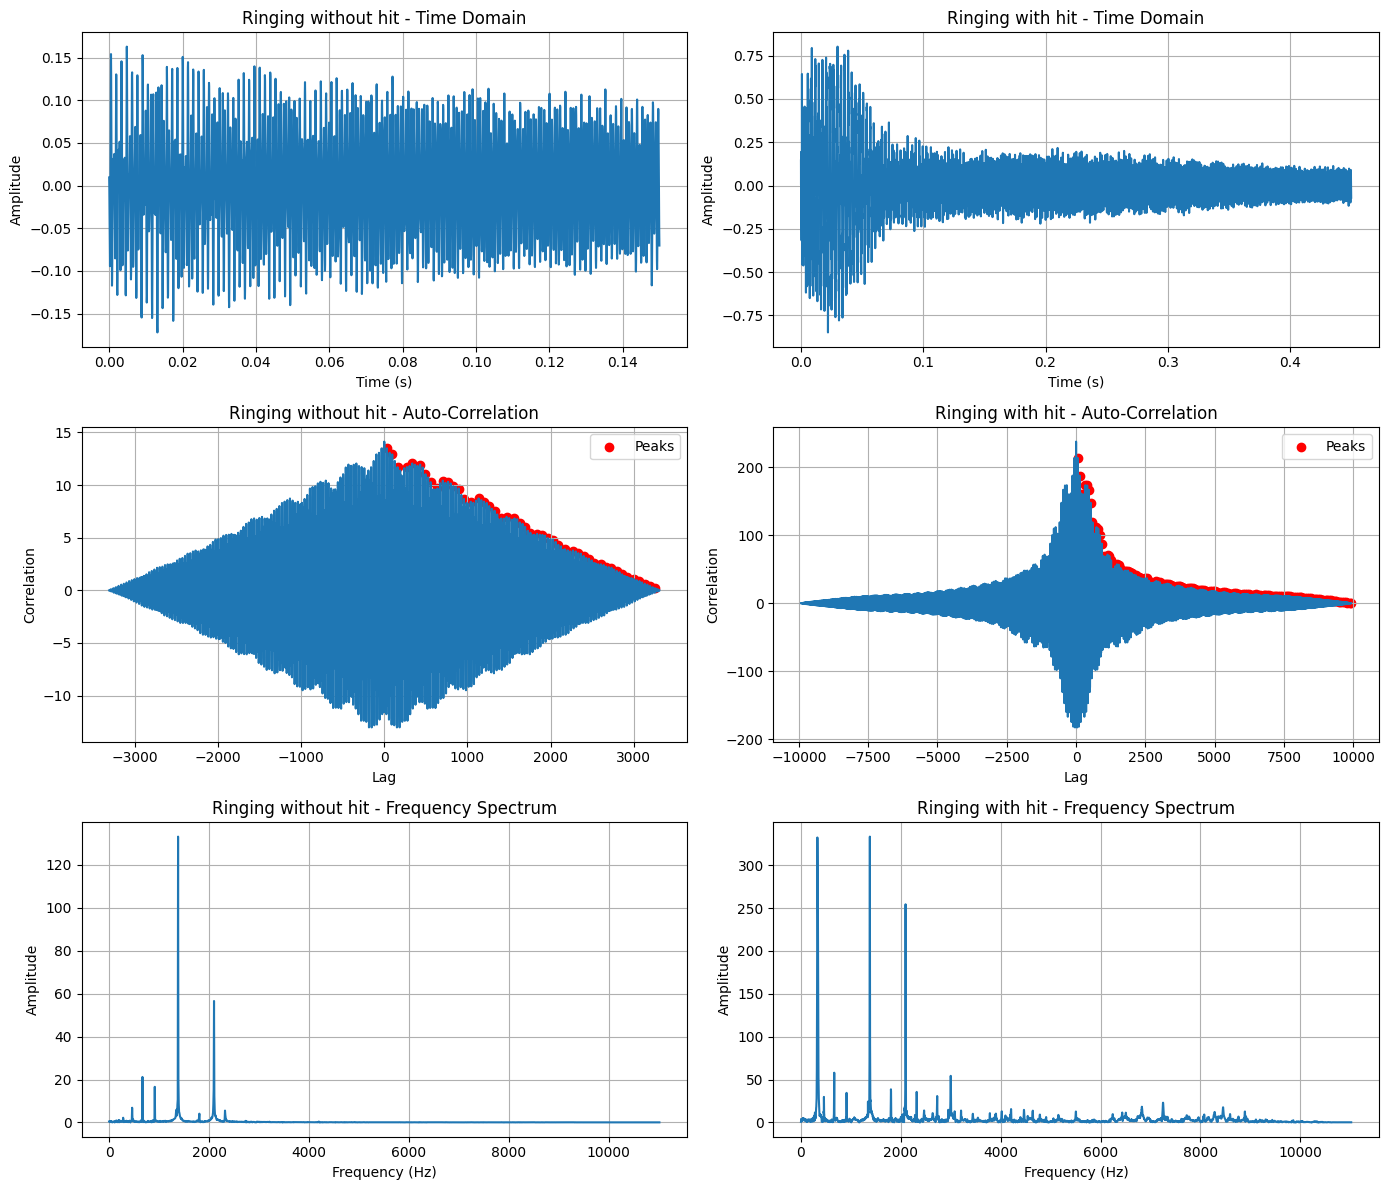

In [5]:
def compute_autocorrelation(signal):
    autocorr = correlate(signal, signal, mode='full')
    lags = np.arange(-len(signal) + 1, len(signal))
    return lags, autocorr

def calculate_kpis(signal):
    mean = np.mean(signal)
    std = np.std(signal)
    var = np.var(signal)
    return {"Mean": mean, "Std Dev": std, "Variance": var}

def compute_fft(signal, sample_rate):
    N = len(signal)
    freqs = np.fft.fftfreq(N, d=1/sample_rate)
    fft_values = np.abs(fft(signal))[:N//2]
    return freqs[:N//2], fft_values


def plot_signal_analysis(signal1, signal2=None, sample_rate=None, labels=("Signal 1", "Signal 2")):

    signals = [signal1] if signal2 is None else [signal1, signal2]
    num_signals = len(signals)

    fig, axes = plt.subplots(3, num_signals, figsize=(7 * num_signals, 12))
    axes = axes if num_signals > 1 else [axes]

    for idx, signal in enumerate(signals):
        # Time Domain
        times = np.arange(len(signal)) / sample_rate
        axes[0][idx].plot(times, signal)
        axes[0][idx].set_title(f"{labels[idx]} - Time Domain")
        axes[0][idx].set_xlabel("Time (s)")
        axes[0][idx].set_ylabel("Amplitude")
        axes[0][idx].grid()

        # Auto-Correlation
        lags, autocorr = compute_autocorrelation(signal)
        peaks, _ = find_peaks(autocorr[len(autocorr)//2:], distance=50)
        peak_lags = lags[len(autocorr)//2:][peaks]
        axes[1][idx].plot(lags, autocorr)
        axes[1][idx].scatter(peak_lags, autocorr[len(autocorr)//2:][peaks], color='red', label='Peaks')
        axes[1][idx].set_title(f"{labels[idx]} - Auto-Correlation")
        axes[1][idx].set_xlabel("Lag")
        axes[1][idx].set_ylabel("Correlation")
        axes[1][idx].legend()
        axes[1][idx].grid()

        # Frequency Spectrum (FFT)
        freqs, fft_values = compute_fft(signal, sample_rate)
        axes[2][idx].plot(freqs, fft_values)
        axes[2][idx].set_title(f"{labels[idx]} - Frequency Spectrum")
        axes[2][idx].set_xlabel("Frequency (Hz)")
        axes[2][idx].set_ylabel("Amplitude")
        axes[2][idx].grid()

        # Identify peaks in the FFT values
        peaks, properties = find_peaks(fft_values, height=40)
        dominant_frequencies = freqs[peaks]

        # Display the frequencies
        print(f"{labels[idx]} Dominant Frequencies (Hz):", dominant_frequencies)

        # KPIs
        kpis = calculate_kpis(signal)
        print(f"KPIs for {labels[idx]}: {kpis}")

    plt.tight_layout()
    plt.show()


plot_signal_analysis(signal1=signal, signal2=signal_hit, sample_rate=sample_rate, labels=("Ringing without hit", "Ringing with hit"))


The signal with the initial hit demonstrates a sharper amplitude decay and additional low-frequency content, which is evident in the frequency spectrum where lower frequencies dominate the early part of the signal. The autocorrelation plot for the signal without the hit displays a smoother and more consistent decay, highlighting stronger periodicity and indicating that the ringing alone is more stable. This conclusion is supported by the calculated KPIs: the signal without the hit has a lower variance (0.0043 compared to 0.0239) and standard deviation (0.065 compared to 0.154), which indicate more predictable and stable oscillations. In contrast, the initial strike introduces transient energy and broadens the frequency spectrum, adding harmonics but reducing the overall stability of the periodic pattern, as reflected in the less uniform autocorrelation decay.

with the next plots i will focuse on zoomed-in regions of the ringing signal, comparing the raw signal to aligned sine waves of the dominant frequencies extracted from the FFT. This demonstrates how well these frequencies represent the periodic structure of the signal.

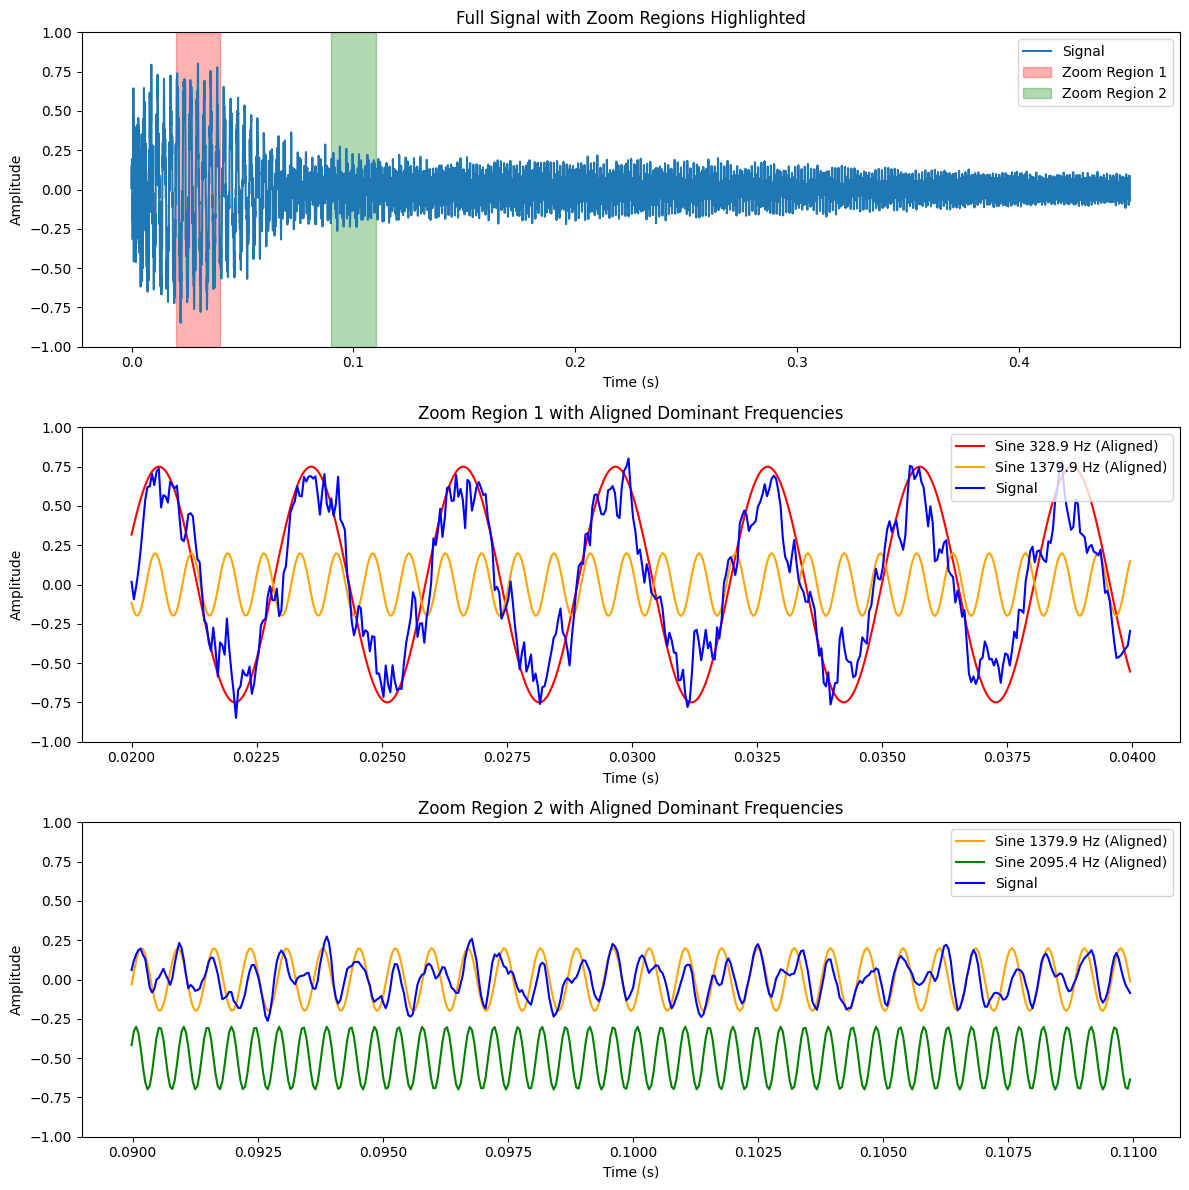

In [6]:
from scipy.signal import correlate


zoom_stage1_start, zoom_stage1_end = 0.02, 0.04 
zoom_stage2_start, zoom_stage2_end = 0.09, 0.11

times = np.arange(0, len(signal_hit)) / sample_rate

zoom_times_stage1 = times[int(zoom_stage1_start * sample_rate):int(zoom_stage1_end * sample_rate)]
zoom_signal_stage1 = signal_hit[int(zoom_stage1_start * sample_rate):int(zoom_stage1_end * sample_rate)]

zoom_times_stage2 = times[int(zoom_stage2_start * sample_rate):int(zoom_stage2_end * sample_rate)]
zoom_signal_stage2 = signal_hit[int(zoom_stage2_start * sample_rate):int(zoom_stage2_end * sample_rate)]

dominant_frequencies = [328.87231684, 1379.93046458, 2095.44996473]


def calculate_phase_offset(signal, sine_wave):
    correlation = correlate(signal, sine_wave, mode='full')
    lag = np.argmax(correlation) - len(sine_wave) + 1
    return lag

def generate_aligned_sine_wave(frequency, time, signal, amplitude=0.2):
    sine_wave = amplitude * np.sin(2 * np.pi * frequency * time)
    lag = calculate_phase_offset(signal, sine_wave)
    aligned_sine_wave = amplitude * np.sin(2 * np.pi * frequency * (time - lag / sample_rate))
    return aligned_sine_wave

# Stage 2: Zoom Region 1
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plt.plot(times, signal_hit, label="Signal")
plt.axvspan(zoom_stage1_start, zoom_stage1_end, color='red', alpha=0.3, label="Zoom Region 1")
plt.axvspan(zoom_stage2_start, zoom_stage2_end, color='green', alpha=0.3, label="Zoom Region 2")
plt.title("Full Signal with Zoom Regions Highlighted")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.ylim(-1, 1)
plt.legend()

plt.subplot(3, 1, 2)
aligned_sine_wave = generate_aligned_sine_wave(
    dominant_frequencies[0], zoom_times_stage1[:len(zoom_signal_stage1)], zoom_signal_stage1, 0.75
)
plt.plot(zoom_times_stage1, aligned_sine_wave, color='red', label=f"Sine {dominant_frequencies[0]:.1f} Hz (Aligned)")
aligned_sine_wave = generate_aligned_sine_wave(
    dominant_frequencies[1], zoom_times_stage1[:len(zoom_signal_stage1)], zoom_signal_stage1
)
plt.plot(zoom_times_stage1, aligned_sine_wave, color='orange', label=f"Sine {dominant_frequencies[1]:.1f} Hz (Aligned)")
plt.plot(zoom_times_stage1, zoom_signal_stage1, color='blue', label="Signal")
plt.title("Zoom Region 1 with Aligned Dominant Frequencies")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.ylim(-1, 1)
plt.legend()

# Stage 3: Zoom Region 2
plt.subplot(3, 1, 3)
aligned_sine_wave = generate_aligned_sine_wave(
    dominant_frequencies[1], zoom_times_stage2[:len(zoom_signal_stage2)], zoom_signal_stage2
)
plt.plot(zoom_times_stage2, aligned_sine_wave, color='orange', label=f"Sine {dominant_frequencies[1]:.1f} Hz (Aligned)")

aligned_sine_wave = generate_aligned_sine_wave(
    dominant_frequencies[2], zoom_times_stage2[:len(zoom_signal_stage2)], zoom_signal_stage2
)
plt.plot(zoom_times_stage2, aligned_sine_wave-0.5, color='green', label=f"Sine {dominant_frequencies[2]:.1f} Hz (Aligned)")
plt.plot(zoom_times_stage2, zoom_signal_stage2, color='blue', label="Signal")
plt.title("Zoom Region 2 with Aligned Dominant Frequencies")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.ylim(-1, 1)
plt.legend()

plt.tight_layout()
plt.show()

Observation:
In the first zoomed region, the sine wave at 328.9 Hz closely follows the signal's overall oscillations, showing its dominance in the lower-frequency range. This can only be observed right after the initial hit and fades the fastest. In the second zoomed region, the sine wave at 1380 Hz captures finer details, confirming its contribution to the higher-frequency components. These aligned sine waves visually highlight the signal's harmonic structure. Note that 1380 and 2095 Hz Frequencies are alredy present in the beginning but fade much slower. The 2095 Hz frequencie was plotted below the other ones to prevent overcrouding of the plot, but is is still interesting to observe its contribution.

#### Day 3 
Kann die Periodizität deines Musters via Auto-Korrelogramm sichtbar gemacht werden? Visualisiere die Resultate geeignet. Beobachte, interpretiere und diskutiere in 2-3 Sätzen.

link to repo
https://github.com/BR4GR/gbsv-challenges

i believe most of the groundwork was done yesterday. Today, the focus will be on generating Auto-Korrelogramms specifically for the zoomed-in sections of the signal. Given the zoomed focus, we expect the correlation to be significantly higher in these regions.


Background: What is a Correlogram?
> In time series analysis, a plot of the sample autocorrelations \(r_h\) against time lags \(h\) is called an **autocorrelogram**.  
> If cross-correlation is plotted instead, the result is referred to as a **cross-correlogram**.  
> Autocorrelograms are particularly useful in identifying repeating patterns or periodicity within a signal.  
>  
> Source: [Wikipedia - Correlogram](https://en.wikipedia.org/wiki/Correlogram)


Zoom Region 1 KPIs:
{'Mean': np.float32(0.020076977), 'Std Dev': np.float32(0.43640673), 'Variance': np.float32(0.19045085)}

Zoom Region 2 KPIs:
{'Mean': np.float32(0.0046018558), 'Std Dev': np.float32(0.11034681), 'Variance': np.float32(0.012176419)}

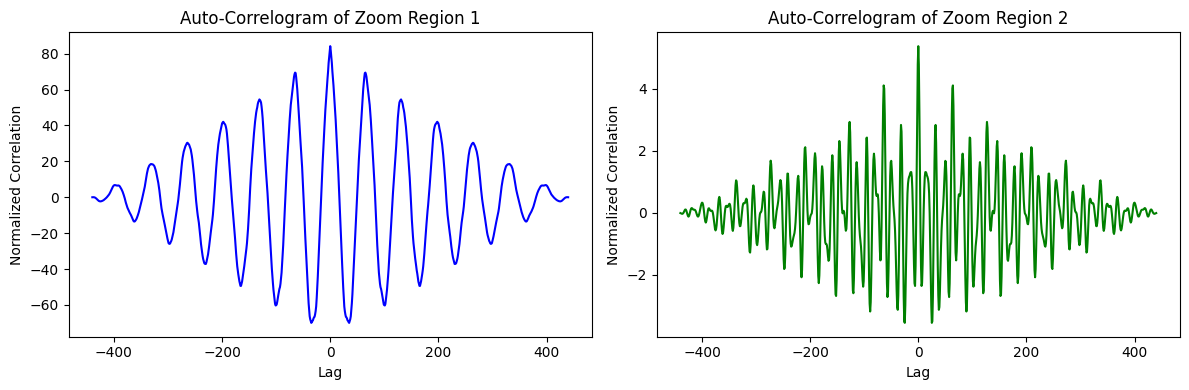

In [7]:
lags1, autocorr1 = compute_autocorrelation(zoom_signal_stage1)
peaks, _ = find_peaks(autocorr1[len(autocorr1)//2:], distance=50)
peak_lags = lags1[len(autocorr1)//2:][peaks]
stage1_kpis = calculate_kpis(zoom_signal_stage1)
print("Zoom Region 1 KPIs:", stage1_kpis)

lags2, autocorr2 = compute_autocorrelation(zoom_signal_stage2)
peaks, _ = find_peaks(autocorr2[len(autocorr2)//2:], distance=50)
peak_lags = lags2[len(autocorr2)//2:][peaks]
stage2_kpis = calculate_kpis(zoom_signal_stage2)
print("Zoom Region 2 KPIs:", stage2_kpis)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(lags1, autocorr1, color='blue')
plt.title(f"Auto-Correlogram of Zoom Region 1")
plt.xlabel("Lag")
plt.ylabel("Normalized Correlation")

plt.subplot(1, 2, 2)
plt.plot(lags2, autocorr2, color='green')
plt.title(f"Auto-Correlogram of Zoom Region 2")
plt.xlabel("Lag")
plt.ylabel("Normalized Correlation")

plt.tight_layout()
plt.show()

Zoom Region 1 shows prominent peaks in the autocorrelation at regular intervals, reflecting a strong and stable periodicity, which aligns well with the dominant 328.9 Hz frequency. This is further supported by higher KPIs like the standard deviation (0.436) and variance (0.190), which indicate stronger oscillatory behavior. In contrast, Zoom Region 2 exhibits less pronounced peaks and more irregular correlations, suggesting weaker periodicity likely caused by higher-frequency harmonics, as seen in the lower standard deviation (0.110) and variance (0.012).  These findings are relevant to the use case because the periodicity detected shows that auto-correlation can reliably identify recurring patterns in the bell's acoustic signal.

#### Day 4
Diskutiere deine Methoden- und Parameterwahl sowie die Resultate in ca. 150 Wörtern.

Switzerland’s iconic church bells serve as a rich source for studying acoustic properties due to their historical significance and precise craftsmanship. In this analysis, the methods and parameters were chosen to explore the ringing patterns of a bell and their connection to its physical properties, like weight and size. Auto-correlation was selected to uncover periodicities within the signal, as it is particularly suited to identifying repeating structures. Two zoom regions of the signal were examined: one focusing on the early, stable ringing (dominated by a single frequency) and another capturing the later, more complex decay with harmonics. The choice of parameters, such as zoom window lengths, was optimized to highlight different characteristics of the bell’s oscillations while maintaining clarity in the visualizations. 
Observing dominant frequencies like 328.9 Hz, 1380 Hz and 2095.4 Hz via FFT one can also observe the fast disapearing of the 328 Hz frequencie.
Their correspondence to auto-correlation peaks supported the hypothesis that periodicity diminishes as the signal decays. This method provides a practical framework for understanding acoustic signatures of bells, offering insights into their inner workings.

#### Day 5
Definiere einen Anwendungsfall, um ein Stück aus deinem Signal wieder zu finden. Schneide nun ein interessantes Stück deines Signals aus. Warum hast du dieses Stück gewählt? Welches Ziel möchtest du mit dem Ausschneiden verfolgen? Soll dieses Stück nur einmal oder mehrfach gefunden werden? Erläutere in wenigen Sätzen.

We will usea slitghtly bigger part from the same place as the previously extracted zoom_signal_stage1 as a representative snippet of the bell's ringing.

I chose this snipped because it can be used for an interesting usecase of trying to count the ocurrences of bell rings in the 1m 14s vaudio we started with. It should be found many times.

In [8]:

initial_ring = signal_hit[int(0.015 * sample_rate):int(0.05 * sample_rate)]

#### Day 6
Versuche das ausgeschnittene Stück via Kreuzkorrelation im Ursprungssignal zu finden. Woran erkennst du, dass die Stelle passt?

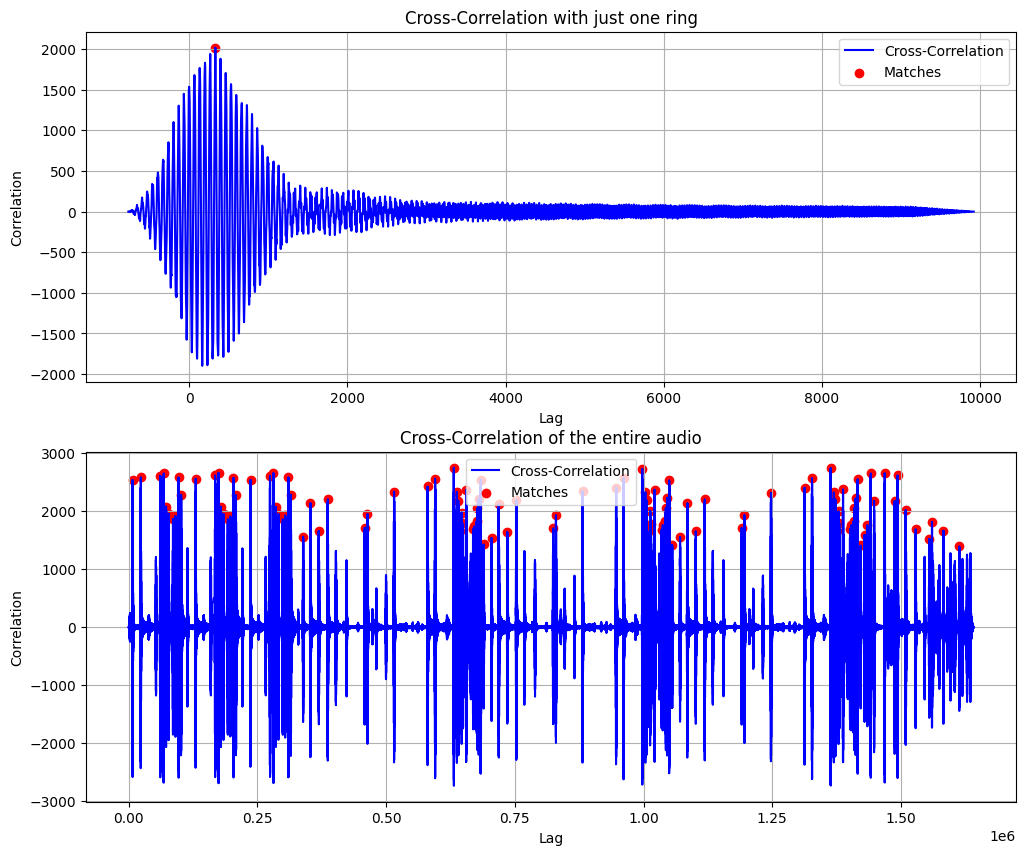

Number of detected matches: 110

In [9]:
normalized_signal_hit = (signal_hit - np.mean(signal_hit)) / np.std(signal_hit)
normalized_initial_ring = (initial_ring - np.mean(initial_ring)) / np.std(initial_ring)
normalized_audio = (audio - np.mean(audio)) / np.std(audio)

# Compute cross-correlation between the initial ring and a full ring
cross_corr = correlate(normalized_signal_hit, normalized_initial_ring, mode='full')
lags = np.arange(-len(normalized_initial_ring) + 1, len(normalized_signal_hit))
# Find peaks in the cross-correlation
peaks, _ = find_peaks(cross_corr, height=np.max(cross_corr) * 0.5, distance=len(normalized_initial_ring))

#compute the cross-correlation between the full signal and the initial ring
cross_corr_full = correlate(normalized_audio, normalized_initial_ring, mode='full')
lags_full = np.arange(-len(normalized_initial_ring) + 1, len(normalized_audio))
# Find peaks in the cross-correlation
peaks_full, _ = find_peaks(cross_corr_full, height=np.max(cross_corr_full) * 0.5, distance=len(normalized_initial_ring))

# Plot the cross-correlation
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.plot(lags, cross_corr, label="Cross-Correlation", color='blue')
plt.scatter(lags[peaks], cross_corr[peaks], color='red', label="Matches")
plt.title("Cross-Correlation with just one ring")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.legend()
plt.grid()

# Plot the cross-correlation
plt.subplot(2, 1, 2)
plt.plot(lags_full, cross_corr_full, label="Cross-Correlation", color='blue')
plt.scatter(lags_full[peaks_full], cross_corr_full[peaks_full], color='red', label="Matches")
plt.title("Cross-Correlation of the entire audio")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.legend()
plt.grid()
plt.show()

print(f"Number of detected matches: {len(peaks_full)}")


Using cross-correlation, the extracted initial ring segment was successfully matched within the original audio containing a full bell ring and the entire audio file with multiple rings. This was verified by identifying peaks in the cross-correlation function, which correspond to the locations where the initial ring pattern aligns with the larger signals. next i will observe the found matches with closer visualizations:

#### Day 7
Visualisiere die Resultate geeignet. Beobachte, interpretiere und diskutiere in 2-3 Sätzen.

because we can not visualy observe all the 110 matches found, a random match will be displayed in the plot below, showing a segment, which starts 0.1 seconds bevore the match and lasts 1 second. You can also listen to the segment or click the button to see another match.

In [10]:
# Function to generate updated plots with compact KPI box and aligned zoomed-in regions
def generate_updated_segment_plots_with_kpis(audio, sample_rate, peaks, lag, segment_duration=1.0, pre_peak_time=0.1, num_samples=9995):
    for i in range(min(num_samples, len(peaks))):
        peak_idx = peaks[i]
        peak_time = lag[peak_idx] / sample_rate

        # Define segment start and end
        start_time = max(0, peak_time - pre_peak_time)
        end_time = min(len(audio) / sample_rate, start_time + segment_duration)

        start_sample = int(start_time * sample_rate)
        end_sample = int(end_time * sample_rate)
        audio_segment = audio[start_sample:end_sample]

        # Compute KPIs
        mean = np.mean(audio_segment)
        std_dev = np.std(audio_segment)
        variance = np.var(audio_segment)
        snr = 10 * np.log10(np.mean(audio_segment**2) / np.std(audio_segment)**2)
        energy = np.sum(audio_segment**2)
        par = np.max(np.abs(audio_segment)) / mean if mean != 0 else np.inf

        # Create time axis for the segment
        times = np.linspace(start_time, end_time, len(audio_segment))

        # Identify matches within the segment
        matches_within_segment = [
            (lag[peak] / sample_rate) for peak in peaks
            if start_time <= (lag[peak] / sample_rate) <= end_time
        ]

        # Plot the waveform and zoomed region
        fig, axs = plt.subplots(2, 1, figsize=(20, 8), gridspec_kw={'height_ratios': [3, 1]})

        # Top Plot: Full segment with zoom region
        axs[0].plot(times, audio_segment, label="Waveform", color="blue")
        for match_time in matches_within_segment:
            axs[0].axvspan(match_time, match_time + 0.02, color='red', alpha=0.2)
        axs[0].set_title(f"Match {i}")
        axs[0].set_xlabel("Time (s)")
        axs[0].set_ylabel("Amplitude")
        axs[0].legend()

        # Bottom Plot: Compact KPI visualization
        kpi_text = (
            f"SNR (dB): {snr:.2f} - Clarity of the signal\n"
            f"Energy: {energy:.2f} - Total signal strength\n"
            f"PAR: {par:.2f} - Prominence of peaks"
        )
        axs[1].axis("off")
        axs[1].text(0.5, 0.5, kpi_text, transform=axs[1].transAxes,
                    fontsize=12, va="center", ha="center", bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

        # Save the plot
        plot_file = f"bell_segments/segment_plot_{i}.png"
        plt.tight_layout()
        plt.savefig(plot_file)
        plt.close()

# Generate updated plots with KPIs for all segments
generate_updated_segment_plots_with_kpis(audio, sample_rate, peaks_full, lags_full)


<script>
    function displayRandomSegment() {
        const numSegments = 110; // Total segments available
        const randomIndex = Math.floor(Math.random() * numSegments);

        // Update image and audio dynamically
        document.getElementById("segmentPlot").src = `bell_segments/segment_plot_${randomIndex}.png`;
        document.getElementById("audioPlayer").src = `bell_segments/audio_segment_${randomIndex}.wav`;
        document.getElementById("segmentTitle").innerText = `Currently Showing: Segment ${randomIndex}`;
    }

    window.onload = displayRandomSegment; // Display a random segment on page load
</script>

<div style="text-align: center;">
    <h2>Randomly Selected Segment</h2>
    <img id="segmentPlot" src="" alt="Waveform Plot" style="width:100%; border: 2px solid #ccc; border-radius: 8px;">
    <br><br>
    <audio id="audioPlayer" controls style="width:90%; margin-top: 10px;">
        <source src="" type="audio/wav">
        Your browser does not support the audio element.
    </audio>
    <button onclick="displayRandomSegment()" style="padding: 10px 20px; background-color: #007BFF; color: white; border: none; border-radius: 5px; font-size: 16px; cursor: pointer;">
        See Another Result
    </button>
</div>


The visualization demonstrates the cross-correlation matches by presenting a randomly selected segment containing a detected match. The matches is highlighted with a red rectangle, showing its location within the segment. The KPIs provided below the plot include SNR (Signal-to-Noise Ratio), Energy, and PAR (Peak-to-Average Ratio), offering insights into the segment's characteristics. SNR, a measure of signal clarity, helps assess how distinguishable the bell sound is from noise. Energy quantifies the total signal strength, reflecting the intensity of the bell's sound. PAR indicates the prominence of the peaks, highlighting the sharpness and distinctiveness of the bell's ring.

#### Day 8
Welche Arten von Veränderungen könntest du auf deinem Signal anwenden, um zu testen, ob das ausgeschnittene Stück weiterhin gefunden wird? Nenne die 1-2 wichtigsten Veränderungen passend zu deinem Anwendungsfall. Erläutere in 1-2 Sätzen, warum genau diese Veränderungen relevant sind.

To test if the extracted bell segment can still be found after transformations, we will apply two changes. First, we will add background noise to test the robustness of the clarity (SNR) KPI, testing if the method still works even in noisy environments. Second, we will scale the energy of the segment, simulating variations in the strength of the hit or the distance of the bell from the recorder. These transformations should reflect realistic conditions under which the bell might be recorded, such as varying impact strengths or recording setups.

#### Day 9 
Verändere nun dein ausgeschnittenes Stück entsprechend.

In [11]:
def add_background_noise(signal, noise_level=0.5):
    signal_power = np.mean(signal**2)
    noise_power = abs(signal_power * noise_level)
    noise = np.random.normal(0, noise_power, len(signal))
    return signal + noise

def scale_energy(signal, scaling_factor=0.5):
    return scaling_factor * signal


noisy_initial_ring = add_background_noise(initial_ring)
scaled_initial_ring = scale_energy(initial_ring)
noisy_and_scaled_initial_ring = add_background_noise(scaled_initial_ring)


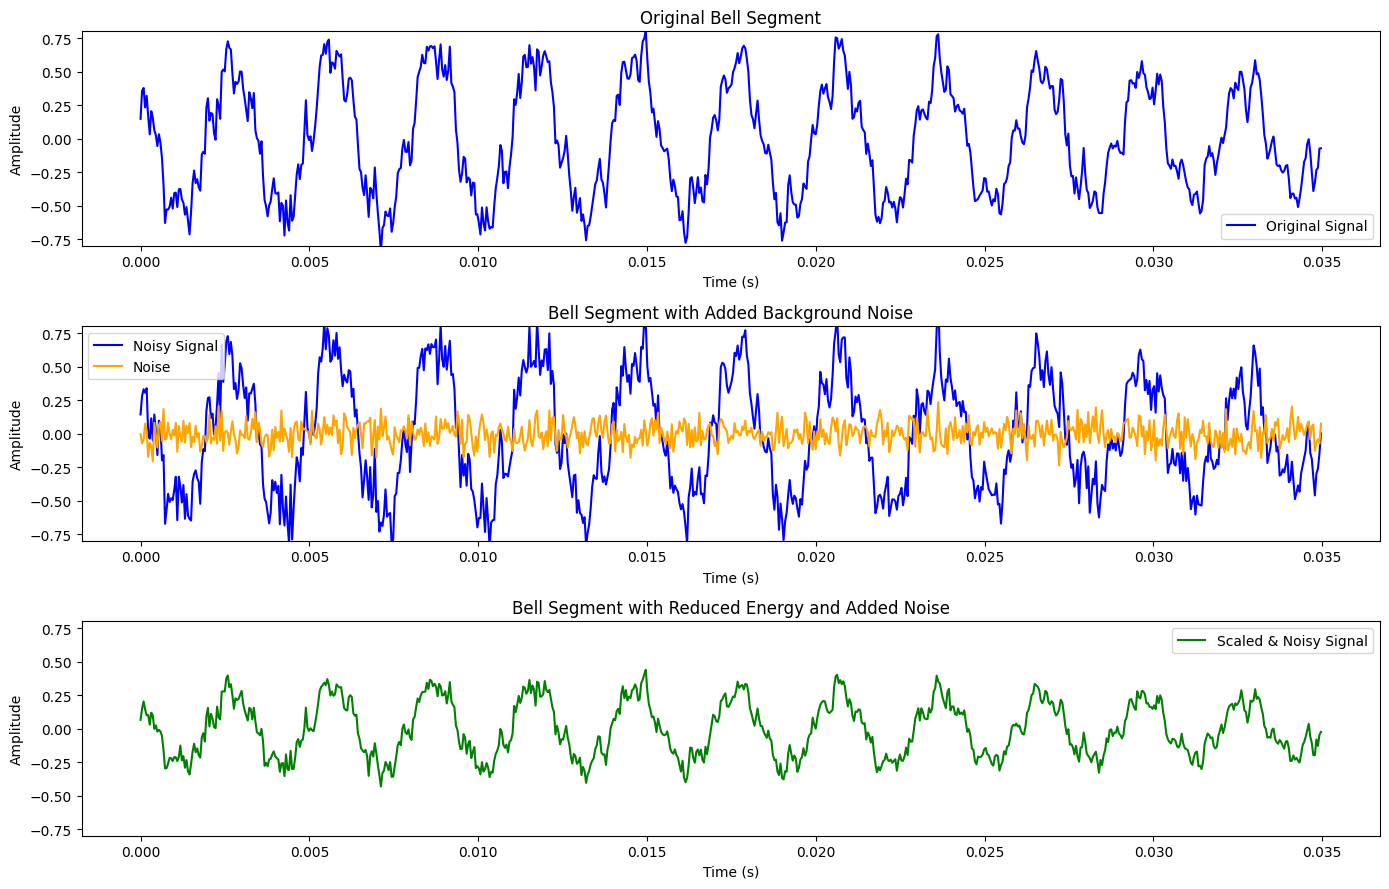

In [12]:
# Time axis for plotting
time_axis = np.arange(len(initial_ring)) / sample_rate

plt.figure(figsize=(14, 9))

# Original Signal
plt.subplot(3, 1, 1)
plt.plot(time_axis, initial_ring, label='Original Signal', color='blue')
plt.title('Original Bell Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-0.8, 0.8)
plt.legend()

# Noisy Signal
plt.subplot(3, 1, 2)
plt.plot(time_axis, noisy_initial_ring, label='Noisy Signal', color='blue')
plt.plot(time_axis, noisy_initial_ring - initial_ring, label='Noise', color='orange')
plt.title('Bell Segment with Added Background Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-0.8, 0.8)
plt.legend()

# Scaled and Noisy Signal
plt.subplot(3, 1, 3)
plt.plot(time_axis, noisy_and_scaled_initial_ring, label='Scaled & Noisy Signal', color='green')
plt.title('Bell Segment with Reduced Energy and Added Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.ylim(-0.8, 0.8)
plt.legend()

plt.tight_layout()
plt.show()

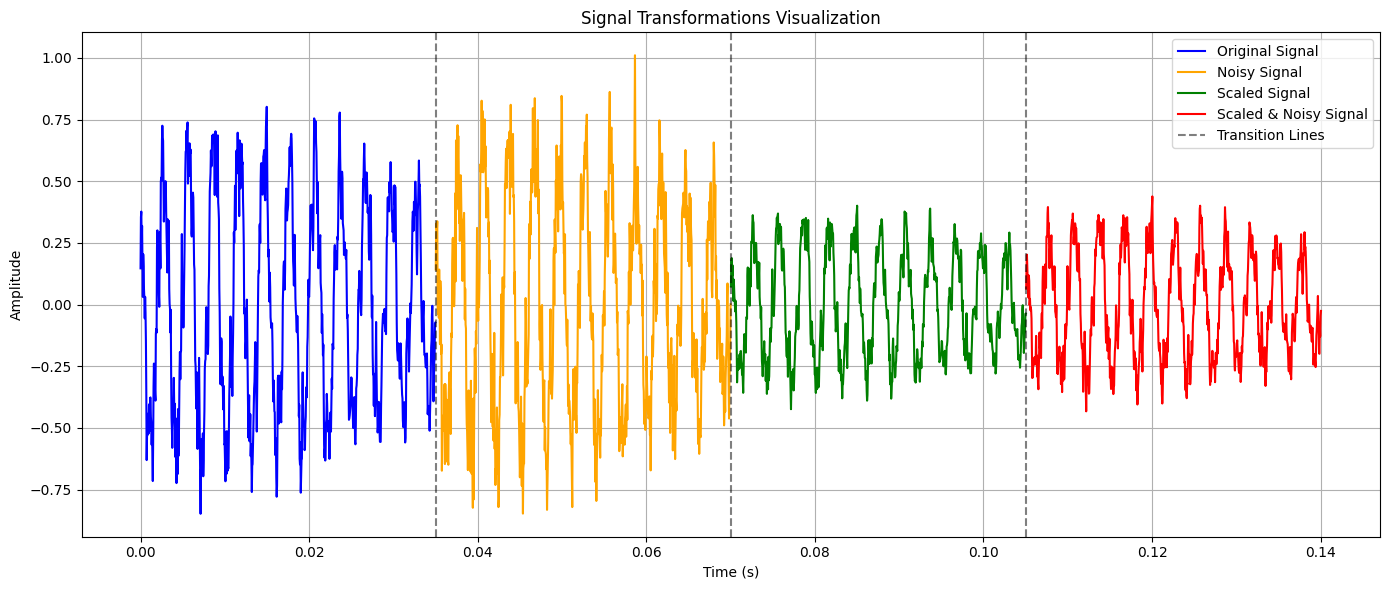

In [13]:
# Define a single time axis for all segments
total_length = len(initial_ring) * 4
time_axis = np.linspace(0, total_length / sample_rate, total_length)

# Combine all signals into one sequence

combined_signal = np.concatenate((
    initial_ring,
    noisy_initial_ring,
    scaled_initial_ring,
    noisy_and_scaled_initial_ring
))

# Define colors for each segment
segment_colors = ['blue', 'orange', 'green', 'red']

# Plot the combined signal with segments highlighted
plt.figure(figsize=(14, 6))

# Plot each segment with a different color
for i, (signal, color, label) in enumerate(zip(
        [initial_ring, noisy_initial_ring, scaled_initial_ring, noisy_and_scaled_initial_ring],
        segment_colors,
        ['Original Signal', 'Noisy Signal', 'Scaled Signal', 'Scaled & Noisy Signal'])):
    
    start_idx = i * len(initial_ring)
    end_idx = (i + 1) * len(initial_ring)
    segment_time_axis = time_axis[start_idx:end_idx]
    
    plt.plot(segment_time_axis, signal, label=label, color=color)

# Add annotations and labels
plt.title("Signal Transformations Visualization")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.axvline(len(initial_ring) / sample_rate, color='black', linestyle='--', alpha=0.5, label="Transition Lines")
plt.axvline(2 * len(initial_ring) / sample_rate, color='black', linestyle='--', alpha=0.5)
plt.axvline(3 * len(initial_ring) / sample_rate, color='black', linestyle='--', alpha=0.5)
plt.legend(loc="upper right")
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [14]:
def calculate_kpis(signal):
    mean = np.mean(signal)
    std_dev = np.std(signal)
    variance = np.var(signal)
    energy = np.sum(signal ** 2)
    snr = 10 * np.log10(np.mean(signal ** 2) / np.var(signal))
    par = np.max(np.abs(signal)) / np.mean(np.abs(signal))
    return {
        'Mean': mean,
        'Std Dev': std_dev,
        'Variance': variance,
        'Energy': energy,
        'SNR (dB)': snr,
        'PAR': par
    }

kpi_df = pd.DataFrame({
    'Original Signal': calculate_kpis(initial_ring),
    'Noisy Signal': calculate_kpis(noisy_initial_ring),
    'Scaled & Noisy Signal': calculate_kpis(noisy_and_scaled_initial_ring)
})

print("Key Performance Indicators (KPIs):")
print(kpi_df)


Key Performance Indicators (KPIs):

Original Signal  Noisy Signal  Scaled & Noisy Signal
Mean            -0.008270     -0.010172              -0.004195
Std Dev          0.404755      0.409871               0.203135
Variance         0.163827      0.167995               0.041264
Energy         126.527008    129.771743              31.869330
SNR (dB)         0.001813      0.002674               0.001852
PAR              2.399498      2.843935               2.482219

#### Day 10 
Schaue, ob das Stück immer noch via Kreuzkorrelation im veränderten 1D Signal gefunden werden kann. Visualisiere die Resultate geeignet. Beobachte, interpretiere und diskutiere in 2-3 Sätzen.

#### Day 11
Welche Arten von Veränderungen werden toleriert? Welche nicht?

#### Day 12 
Diskutiere deine Methoden- und Parameterwahl sowie die Resultate in ca. 150 Wörtern.

### 3.2. Segmentation, Morphological Operations, Object Properties in Images


#### Day 13
Passend zu deinem Land: Definiere einen Anwendungsfall, um ähnliche Objekte aus einem einzelnen Bild zu extrahieren bzw. segmentieren, um diese danach möglichst charakteristisch zu vermessen. Suche ein Bild, welches mehrere ähnliche Objekte enthält gemäss deinem Anwendungsfall.

#### Day 14
Segmentiere die Objekte mittels geeigneter 1-2 Methoden. Gebe die Resultate als gelabelte Bilder (binär oder pro Klasse 1 Label) aus.

#### Day 16
Erkläre für jede angewendete Operation in 1-2 Sätzen, warum du diese Operation anwendest. Beobachte, interpretiere und diskutiere in 2-3 Sätzen.

#### Day 17
Überlege dir, mit welchen 2-3 Eigenschaften du die Objekte am charakteristischten vermessen kannst. Extrahiere die einzelnen Objekte, zähle und vermesse die 2-3 Eigenschaften deiner extrahierten Objekte mittels geeigneten Methoden.

#### Day 18
Erstelle ein möglichst minimales aber repräsentatives Skeleton eines deiner Objekte und gebe die Anzahl Pixel des Skeletons aus.

#### Day 19
Diskutiere deine Methoden- und Parameterwahl, sowie deine Erkenntnisse und Resultate in ca. 150 Wörtern. Sind die Resultate für den Anwendungsfall brauchbar?